In [5]:
%%javascript
IPython.notebook.kernel.execute("URL = '" + window.location + "'");

<IPython.core.display.Javascript object>

In [6]:
%matplotlib inline  
%load_ext rpy2.ipython
from utils import init; df = init(URL)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [7]:
df.groupby('Z').mean()

,Unnamed: 0,Y_true,Y_pred
Z,,,
m,502.023132,0.759786,0.0
o,500.095477,0.824121,0.0
y,493.071130,0.761506,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110ac9780>,
      dtype=object)

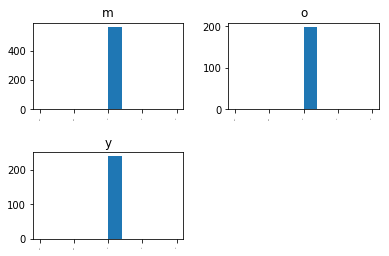

In [8]:
df['Y_pred'].hist(by=df['Z'],xlabelsize = 0)

In [157]:
df = df.query('days_b_screening_arrest >= -30').query('days_b_screening_arrest <= 30').query('is_recid != -1').query('c_charge_degree != "O"').query("score_text != 'N/A'")
df['score_factor'] = [d < 5 for d in df['Y_pred'].values]
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'Z', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'Y_true',
       'vr_case_number', 'vr_charge_degree', 'vr_offense_date',
       'vr_charge_desc', 'type_of_assessment', 'Y_pred', 'score_text',
       'screening_date', 'v_type_of_assessment', 'v_decile_score',
       'v_score_text', 'v_screening_date', 'in_custody', 'out_custody',
       'priors_count.1', 'start', 'end', 'event', 'two_year_recid',
       'score_factor'],
      dtype='object')

In [158]:
import statsmodels.api as sm
model = sm.formula.glm("score_text ~ C(c_charge_degree) + C(Z, Treatment(reference = 'Caucasian'))+ C(sex)+C(age_cat)+priors_count + C(two_year_recid)",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                                       Generalized Linear Model Regression Results                                       
Dep. Variable:     ['score_text[High]', 'score_text[Low]', 'score_text[Medium]']   No. Observations:                 6172
Model:                                                                       GLM   Df Residuals:                     6160
Model Family:                                                           Binomial   Df Model:                           11
Link Function:                                                             logit   Scale:                          1.0000
Method:                                                                     IRLS   Log-Likelihood:                -2234.5
Date:                                                           Tue, 03 Jul 2018   Deviance:                       4468.9
Time:                                                                   15:19:53   Pearson chi2:                 6.02e+03
No. Iterations:         

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5.]),
 array([1.        , 1.06666667, 1.13333333, 1.2       , 1.26666667,
        1.33333333, 1.4       , 1.46666667, 1.53333333, 1.6       ,
        1.66666667, 1.73333333, 1.8       , 1.86666667, 1.93333333,
        2.        , 2.06666667, 2.13333333, 2.2       , 2.26666667,
        2.33333333, 2.4       , 2.46666667, 2.53333333, 2.6       ,
        2.66666667, 2.73333333, 2.8       , 2.86666667, 2.93333333,
        3.        ]),
 <a list of 30 Patch objects>)

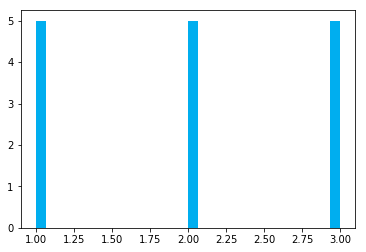

In [18]:
plt.hist([1,2,3], normed=True, bins=30,color='#00AEEF')

In [7]:
datum = box[d]

In [13]:
for m in models:
    print("{} classifier mean is {} for stimulus {}".format(m.capitalize(), datum[m].mean(),d))		

Google classifier mean is 1.28125 for stimulus standard


In [10]:
m.capitalize()

'Google'

In [12]:
datum[m].mean()

1.28125